In [270]:
import pandas as pd
from sqlalchemy import create_engine, text
import os 

import numpy as np
import datetime as dt 
import seaborn as sns
import matplotlib.pyplot as plt


In [271]:
project_path = os.getcwd()
doc_path = os.path.join(project_path, "dataset")
fichiers = os.listdir(doc_path)

cutsomers = pd.read_csv(os.path.join(doc_path, fichiers[0]))
geolocalisation = pd.read_csv(os.path.join(doc_path, fichiers[1]))
orders_dataset = pd.read_csv(os.path.join(doc_path, fichiers[2]))
order_items = pd.read_csv(os.path.join(doc_path, fichiers[3]))
order_payment = pd.read_csv(os.path.join(doc_path, fichiers[4]))
orders_reviews = pd.read_csv(os.path.join(doc_path, fichiers[5]))
products = pd.read_csv(os.path.join(doc_path, fichiers[6]))
sellers = pd.read_csv(os.path.join(doc_path, fichiers[7]))
product_category_name_transalation = pd.read_csv(os.path.join(doc_path, fichiers[8]))

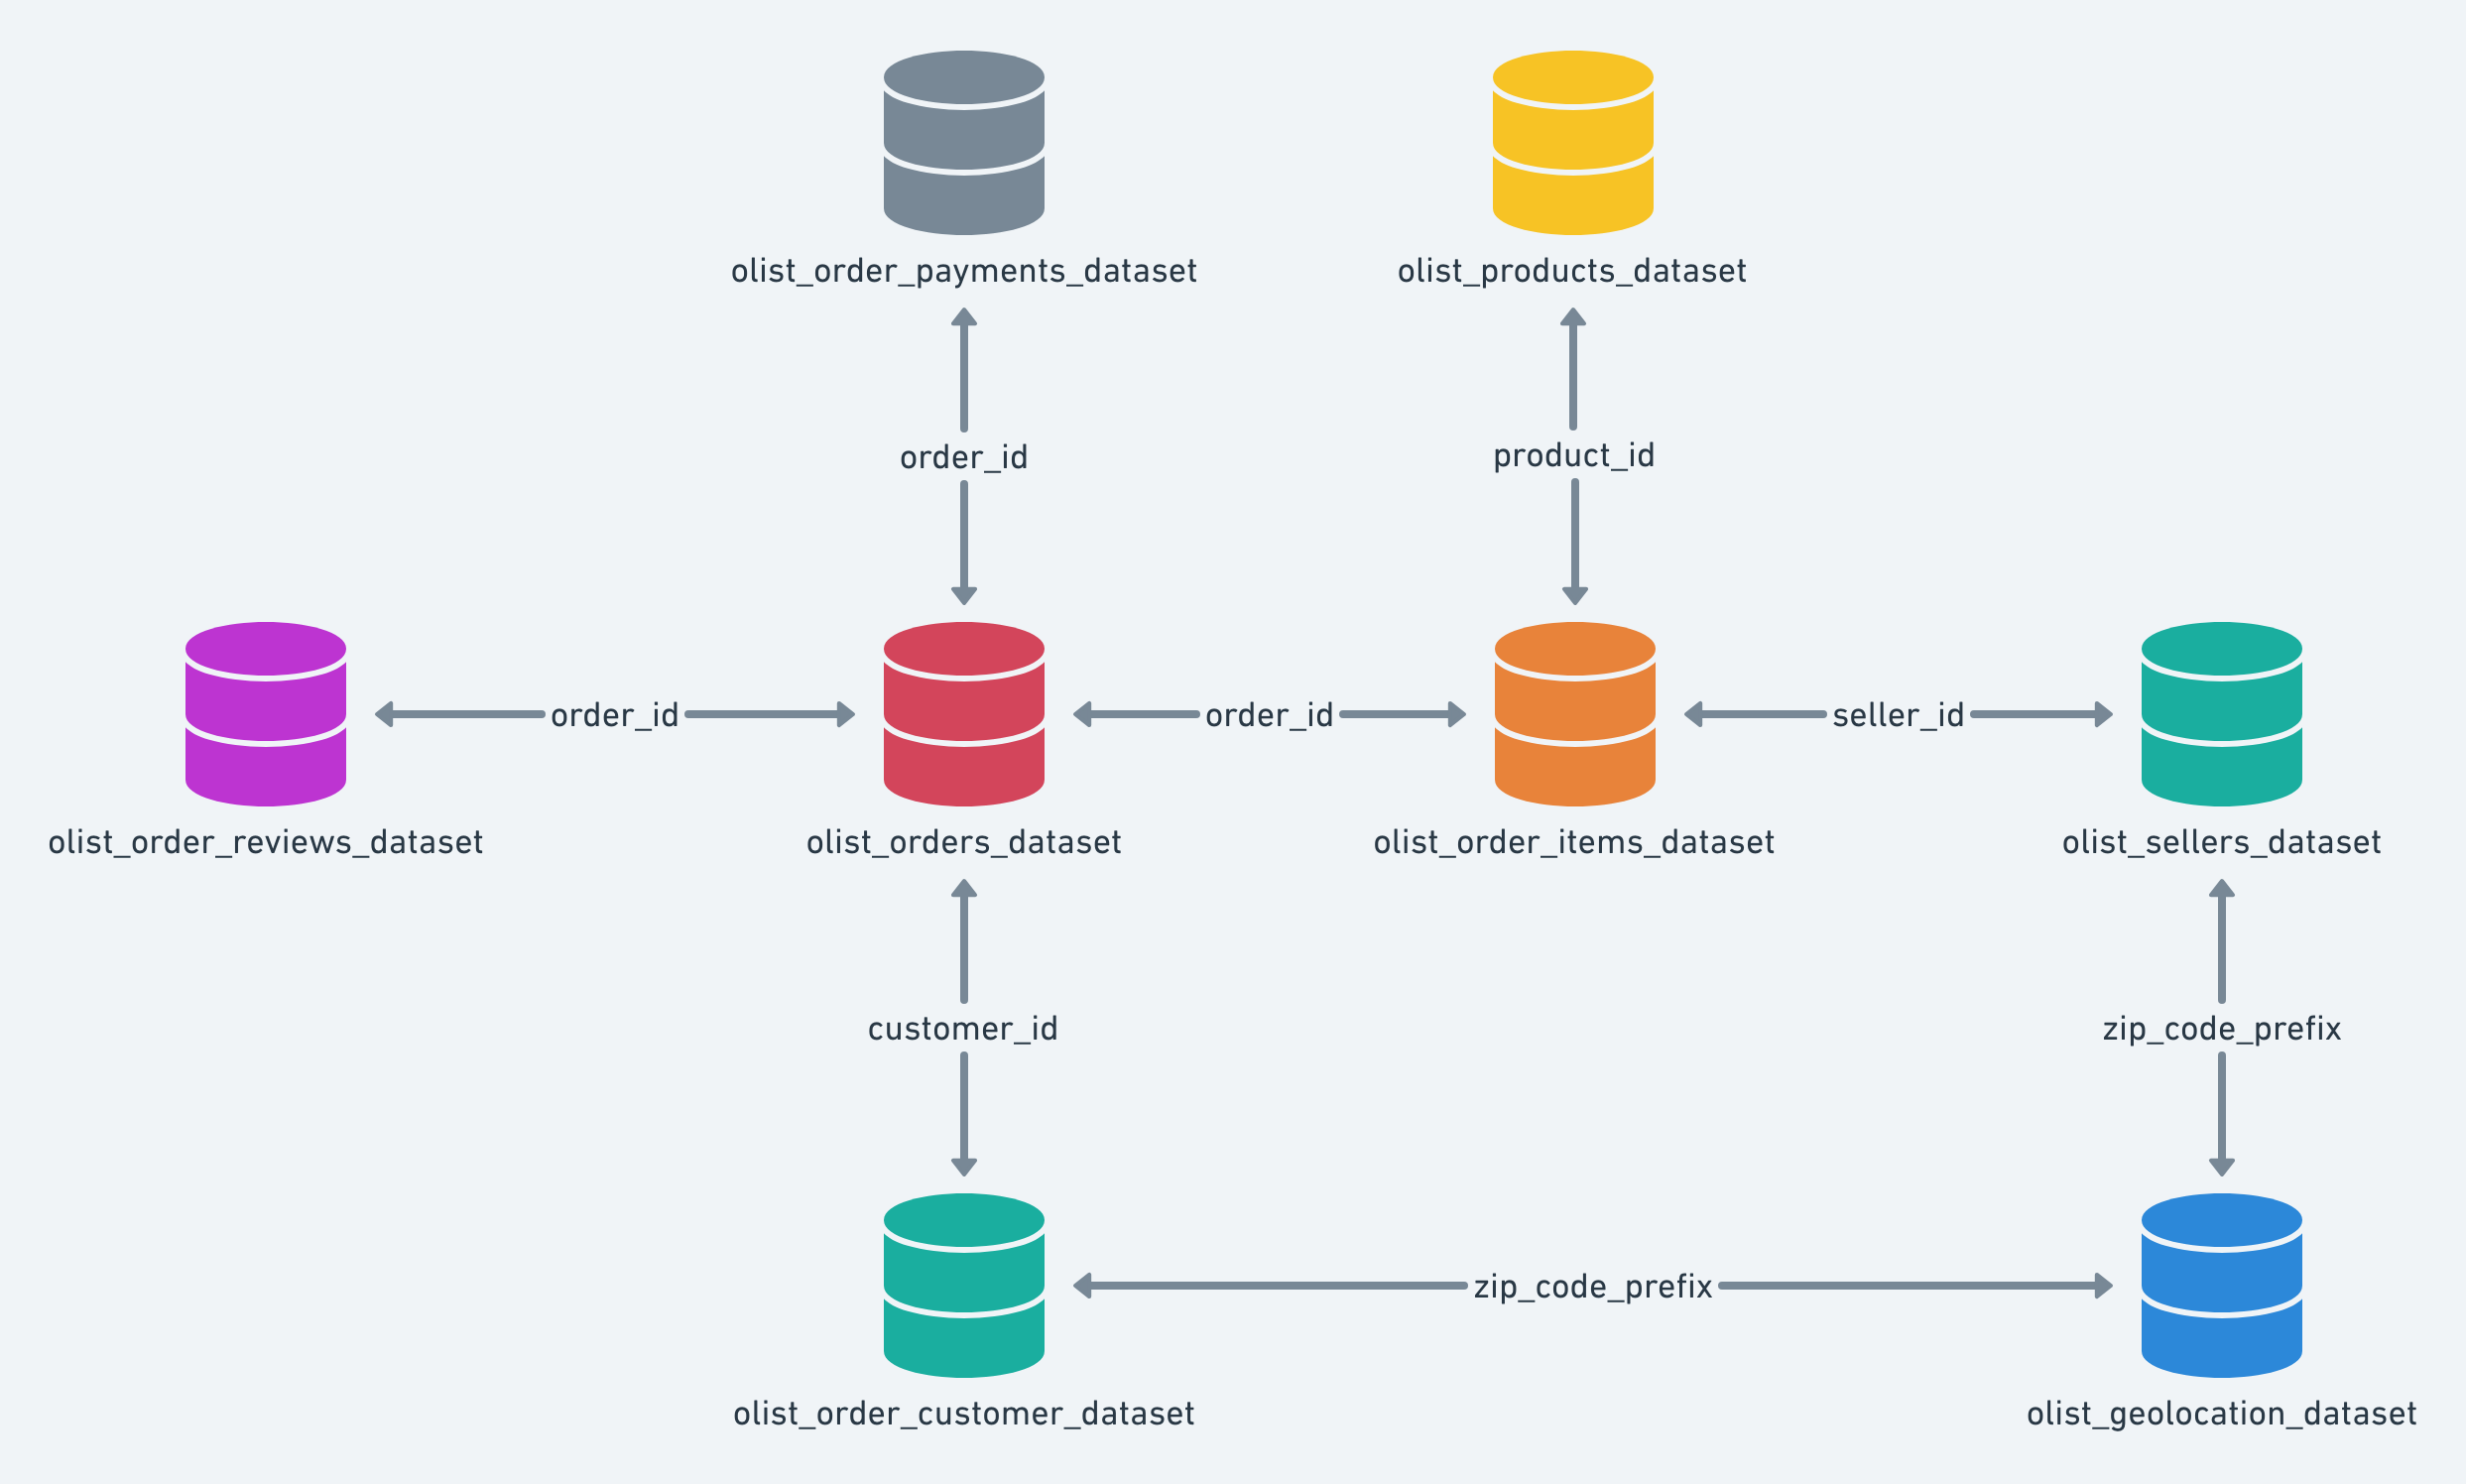

In [272]:
cutsomers.head()
print(len(cutsomers.customer_unique_id.unique()))
print(len(cutsomers.customer_id.unique()))

96096
99441


# Geolocalisation of clients

In [273]:
customer_orders = pd.merge(orders_dataset, cutsomers, on = "customer_id", how = "inner")
customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


<Axes: xlabel='customer_city'>

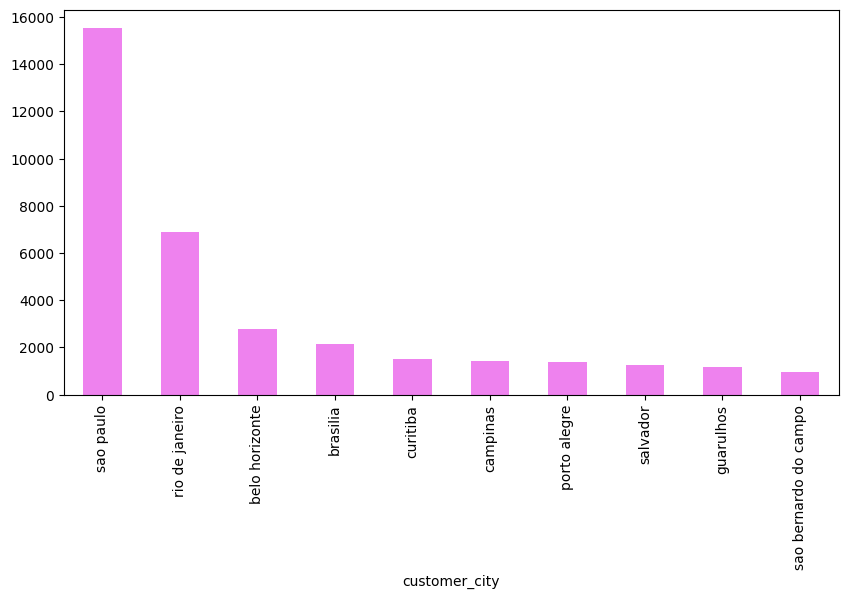

In [274]:
customer_orders["customer_city"].value_counts().nlargest(10).plot(kind = "bar", figsize = (10, 5), color = "violet")

<Axes: xlabel='customer_state'>

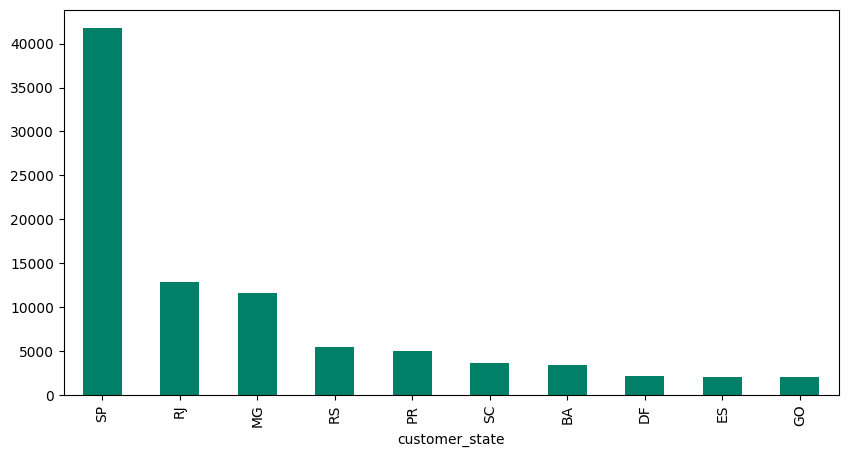

In [275]:
customer_orders["customer_state"].value_counts().nlargest(10).plot(kind = "bar", figsize = (10, 5), cmap = "summer")

In [276]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [277]:
print(len(customer_orders.customer_unique_id.unique()))

96096


## Lets look a seasonality 

### for all our customers

In [278]:
from datetime import timedelta

In [288]:
customer_orders['order_purchase_timestamp'] = pd.to_datetime(customer_orders['order_purchase_timestamp'].dt.date)
customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
12,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,e97109680b052ee858d93a539597bba7,35400,ouro preto,MG


In [289]:
current_date = customer_orders['order_purchase_timestamp'].max()
max_time_lapse = current_date - timedelta(days=365)
customer_orders = customer_orders[customer_orders['order_purchase_timestamp'] > max_time_lapse]
customer_orders.head()


orders_per_date = customer_orders.groupby('order_purchase_timestamp')['order_id'].count()
orders_per_2_weeks = orders_per_date.groupby(pd.Grouper(freq='2W-MON')).sum()
df_orders_per_2_weeks = pd.DataFrame({'Date': orders_per_2_weeks.index, 'Orders': orders_per_2_weeks.values})




In [290]:
customer_orders = customer_orders[customer_orders['order_purchase_timestamp'] > max_time_lapse]
customers_orders_repeat = customer_orders[customer_orders.groupby('customer_unique_id').customer_unique_id.transform('count')>1].copy() 
orders_per_date_repeat = customers_orders_repeat.groupby('order_purchase_timestamp')['order_id'].count()
orders_per_2_weeks_r = orders_per_date_repeat.groupby(pd.Grouper(freq='2W-MON')).sum()
df_orders_per_2_weeks_r = pd.DataFrame({'Date': orders_per_2_weeks_r.index, 'Orders': orders_per_2_weeks_r.values})







C:\Users\litle\AppData\Local\Temp\ipykernel_10868\2248967659.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


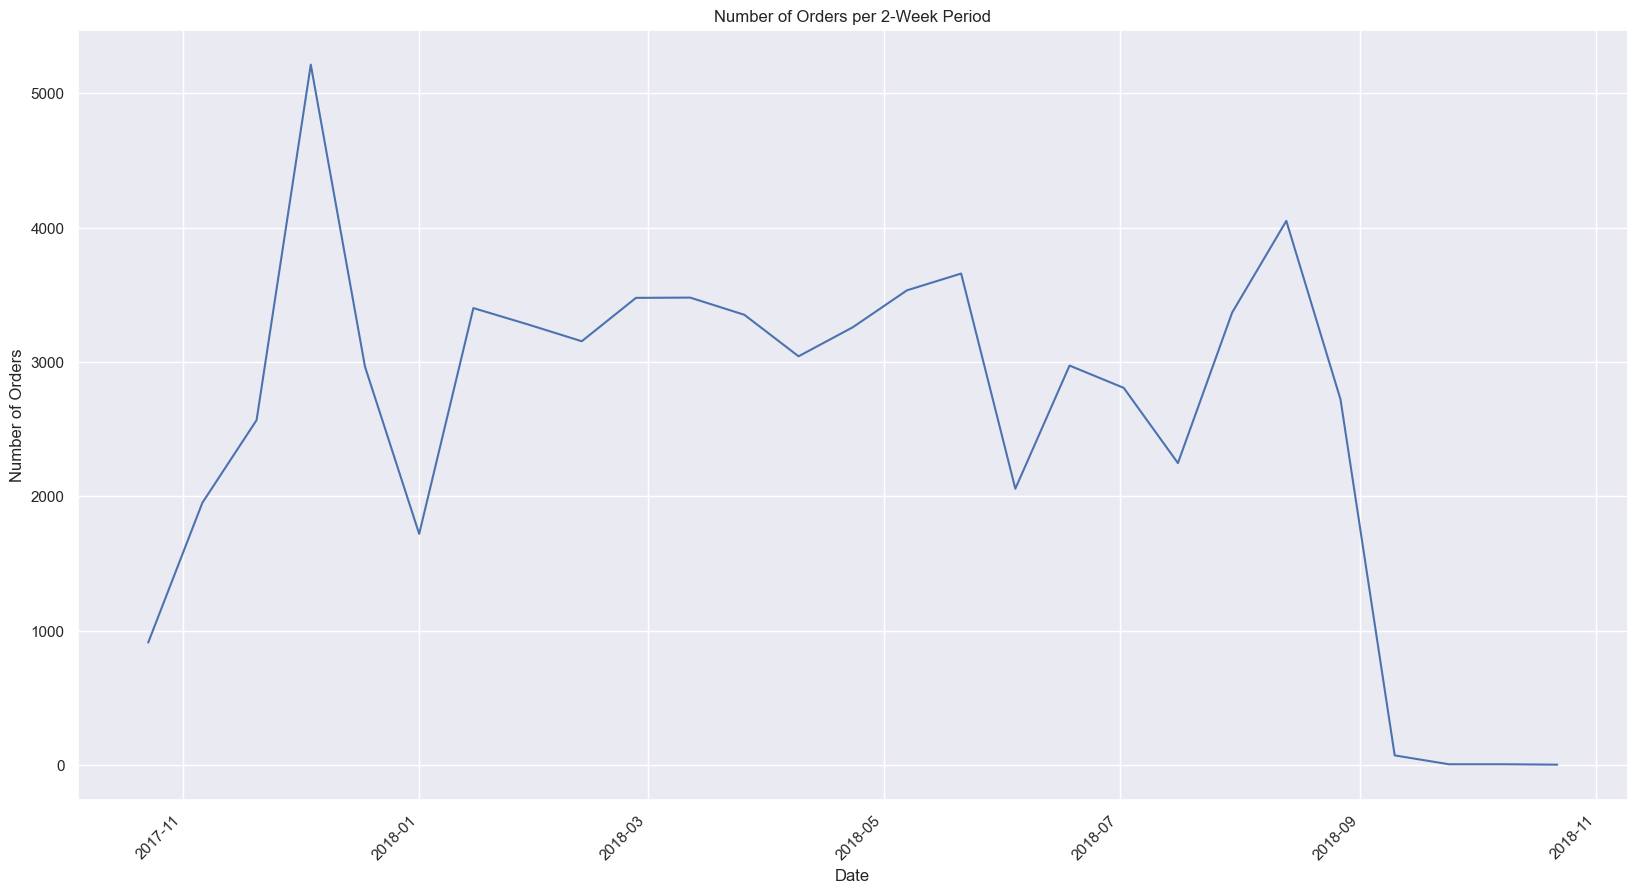

In [291]:

plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='Date', y='Orders', data=df_orders_per_2_weeks)



plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per 2-Week Period')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

C:\Users\litle\AppData\Local\Temp\ipykernel_10868\3001136866.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


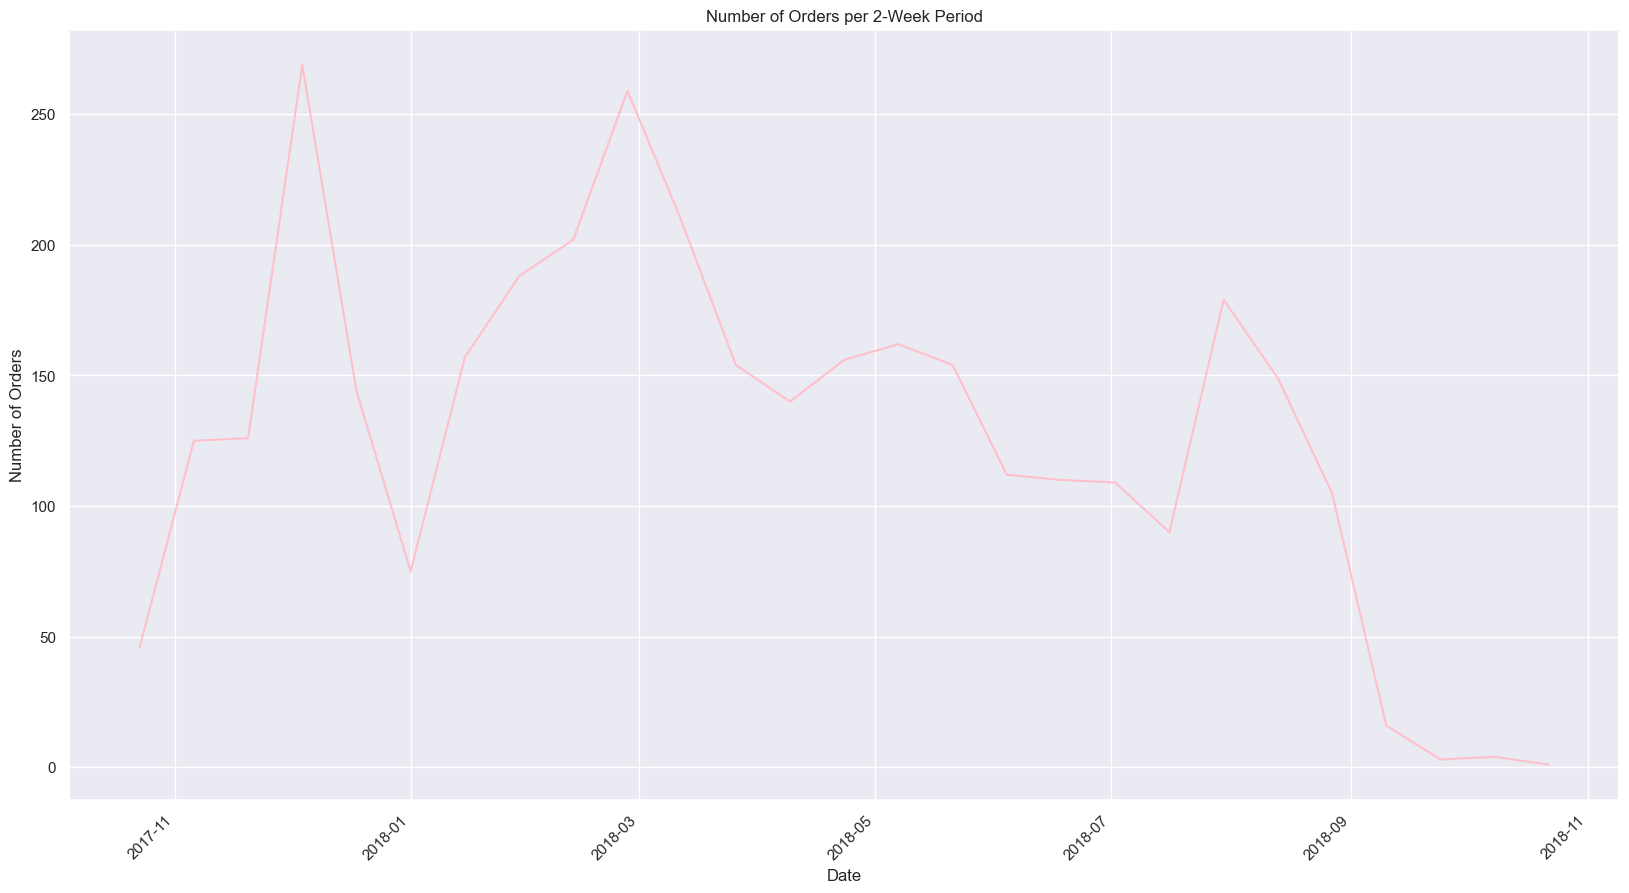

In [292]:

plt.figure(figsize=(20, 10))
ax = sns.lineplot(x='Date', y='Orders', data=df_orders_per_2_weeks_r, color = 'pink')



plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per 2-Week Period')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

### For our repeat customers

C:\Users\litle\AppData\Local\Temp\ipykernel_10868\692213565.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


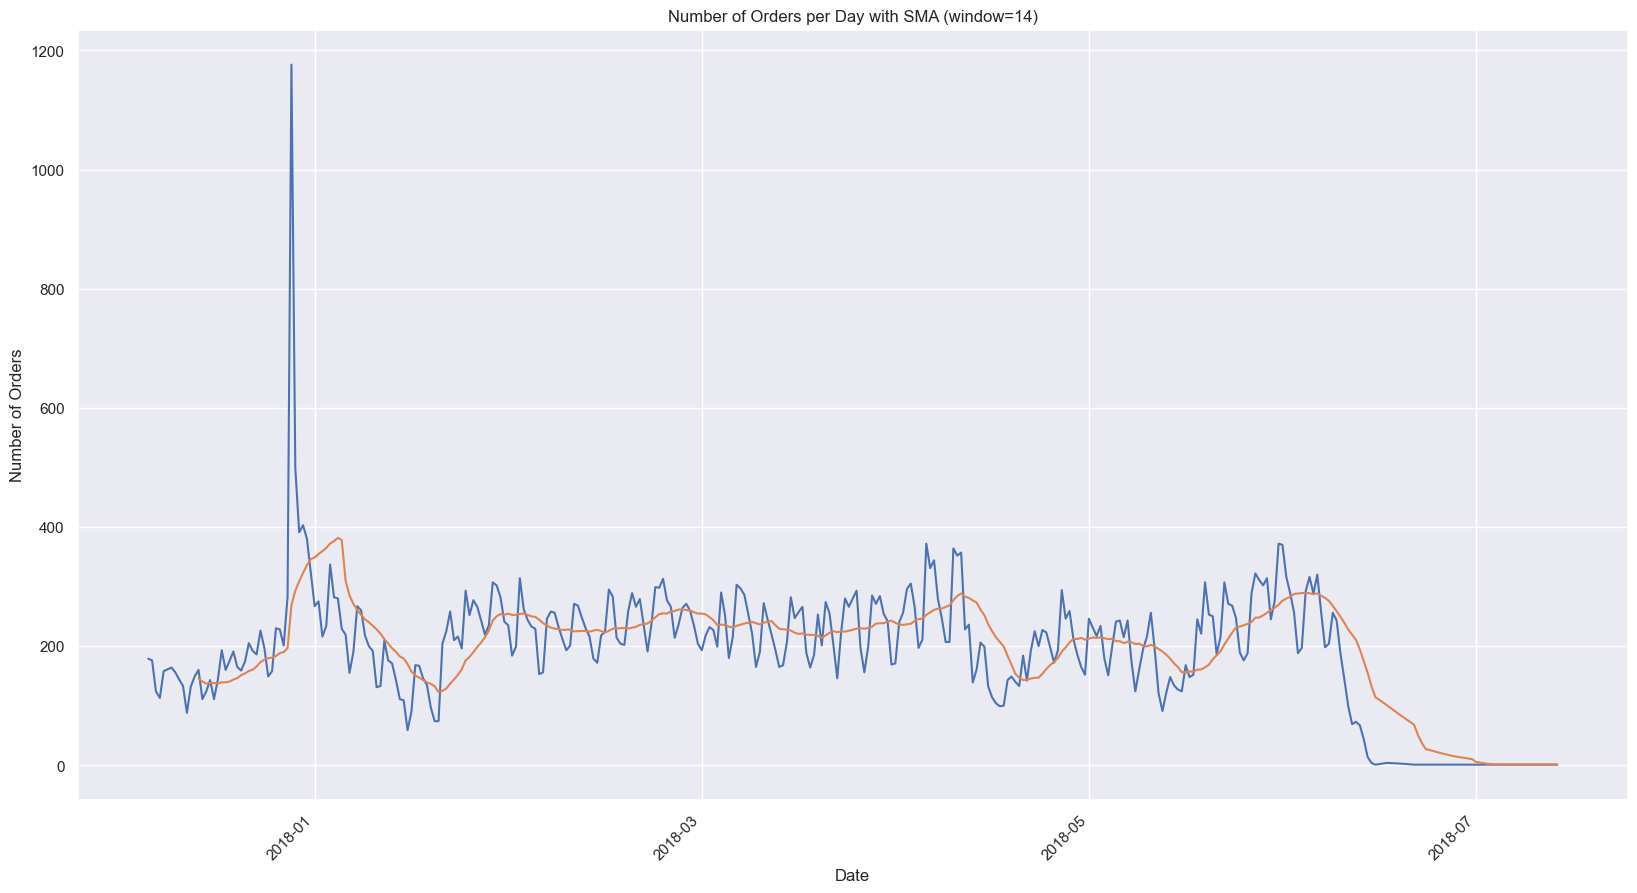

In [302]:

sma_orders = orders_per_date.rolling(window=14).mean()


df_plot = pd.DataFrame({'Date': orders_per_date.index, 'Number of Orders': orders_per_date.values, 'SMA': sma_orders.values})

sns.set(rc={'figure.figsize':(20,10)})

ax = sns.lineplot(x='Date', y='Number of Orders', data=df_plot)
ax = sns.lineplot(x='Date', y='SMA', data=df_plot)


ax.set(xlabel='Date', ylabel='Number of Orders', title='Number of Orders per Day with SMA (window=14)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.show()

C:\Users\litle\AppData\Local\Temp\ipykernel_10868\2458728930.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


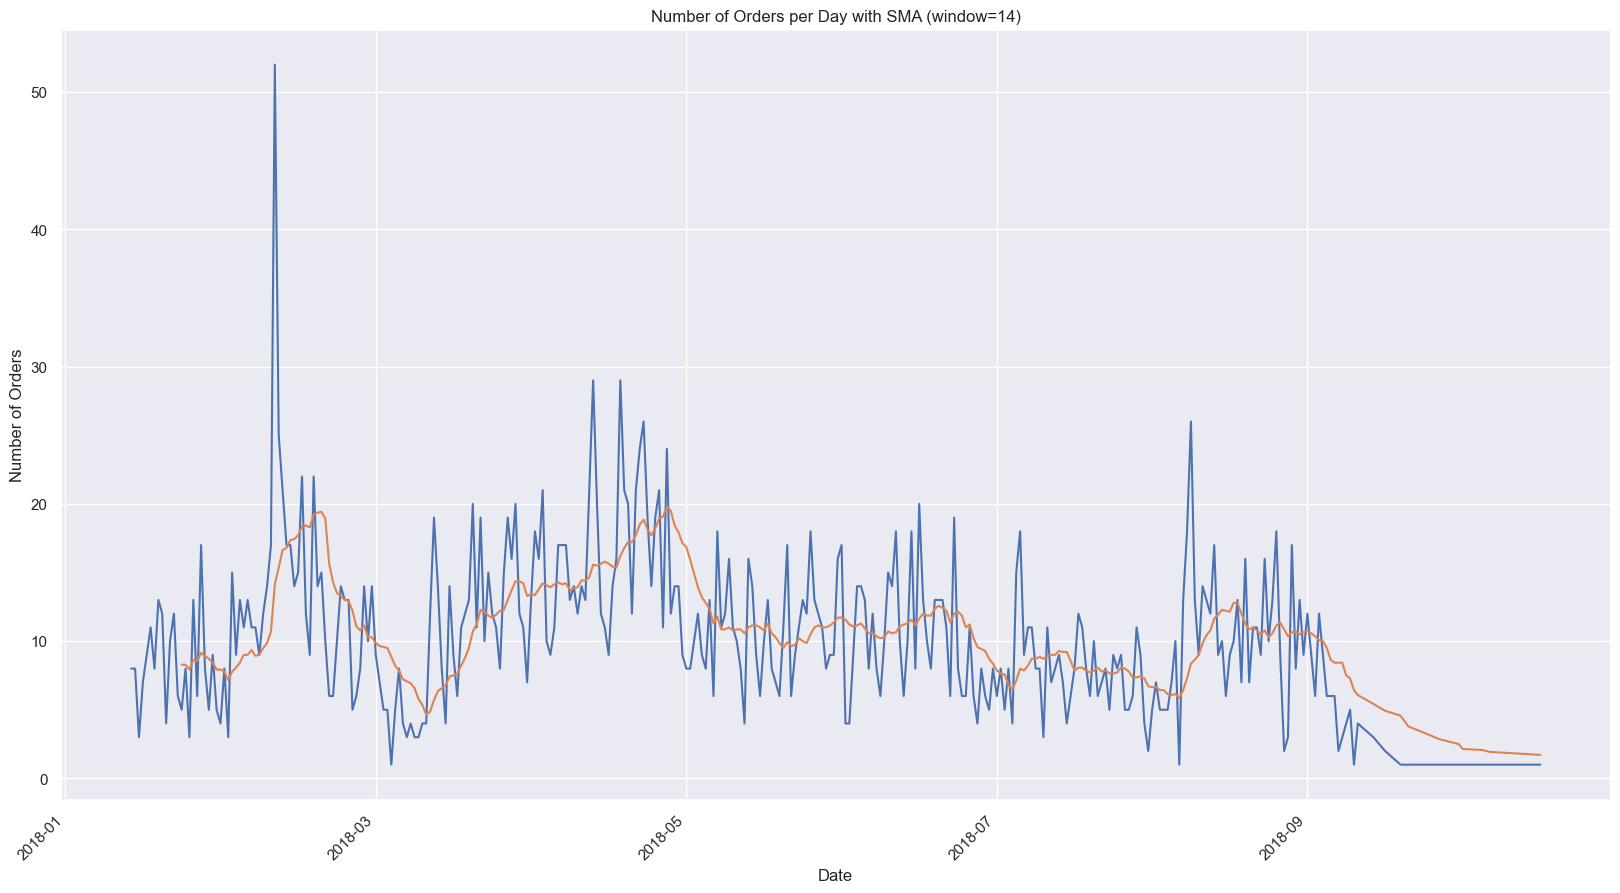

In [303]:

sma_orders = orders_per_date_repeat.rolling(window=14).mean()


df_plot = pd.DataFrame({'Date': orders_per_date_repeat.index, 'Number of Orders': orders_per_date_repeat.values, 'SMA': sma_orders.values})

sns.set(rc={'figure.figsize':(20,10)})

ax = sns.lineplot(x='Date', y='Number of Orders', data=df_plot)
ax = sns.lineplot(x='Date', y='SMA', data=df_plot)


ax.set(xlabel='Date', ylabel='Number of Orders', title='Number of Orders per Day with SMA (window=14)')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

plt.show()

# Cohort analasys by number of customers

In [265]:
def get_month(x): return dt.datetime(x.year, x.month, x.day)
customer_orders['order_purchase_timestamp'] = pd.to_datetime(customer_orders['order_purchase_timestamp'])
customer_orders['InvoiceMonth'] = customer_orders['order_purchase_timestamp'].dt.to_period('M')
customer_orders['CohortMonth'] =  grouping.transform('min')
customer_orders['CohortMonth'] = customer_orders['CohortMonth'].dt.to_period('M')
customer_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,InvoiceMonth,CohortMonth,CohortIndex
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2017-10,2017-09,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,2018-07,2018-07,1
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,2018-08,2018-08,1
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,2017-11,2017-11,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2018-02,2018-02,1


In [266]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
invoiceyear, invoicemonth, _ = get_date_int(customer_orders, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(customer_orders, 'CohortMonth')
years_diff = invoiceyear - cohort_year
months_diff = invoicemonth - cohort_month
customer_orders['CohortIndex'] = years_diff * 12 + months_diff + 1
customer_orders.head()
print(customer_orders['CohortIndex'].unique())

[ 2  1 21  7  6 11  4 10  5  3  9 13  8 18 12 16 14 15 17 20]


In [267]:
grouping = customer_orders.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['customer_unique_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='customer_unique_id')
display(cohort_counts)


CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
CohortMonth,,,,,,,,,,,,,,,,,,,,
2016-09,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,321.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,764.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN,NaN,NaN
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,NaN,NaN,NaN,NaN
2017-06,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


In [268]:
cohortsizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohortsizes, axis=0)
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21
CohortMonth,,,,,,,,,,,,,,,,,,,,
2016-09,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,100.0,NaN,NaN,NaN,NaN,NaN,0.3,NaN,NaN,0.3,NaN,0.3,NaN,0.3,NaN,0.3,NaN,0.3,0.6,0.6
2016-12,100.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,0.4,0.3,0.1,0.4,0.1,0.5,0.1,0.1,NaN,0.4,0.1,0.8,0.4,0.1,0.1,0.3,0.4,0.1,NaN
2017-02,100.0,0.2,0.3,0.1,0.4,0.1,0.2,0.2,0.2,0.2,0.1,0.3,0.2,0.2,0.1,0.1,0.1,0.2,NaN,NaN
2017-03,100.0,0.5,0.4,0.4,0.3,0.2,0.2,0.3,0.3,0.1,0.4,0.2,0.2,0.1,0.2,0.2,0.1,0.2,NaN,NaN
2017-04,100.0,0.6,0.2,0.2,0.3,0.3,0.3,0.3,0.3,0.2,0.3,0.1,0.1,0.0,0.1,0.1,0.2,NaN,NaN,NaN
2017-05,100.0,0.5,0.5,0.4,0.3,0.3,0.4,0.2,0.3,0.3,0.3,0.3,0.3,0.0,0.2,0.3,NaN,NaN,NaN,NaN
2017-06,100.0,0.5,0.4,0.4,0.3,0.4,0.4,0.2,0.1,0.2,0.3,0.4,0.2,0.1,0.2,NaN,NaN,NaN,NaN,NaN


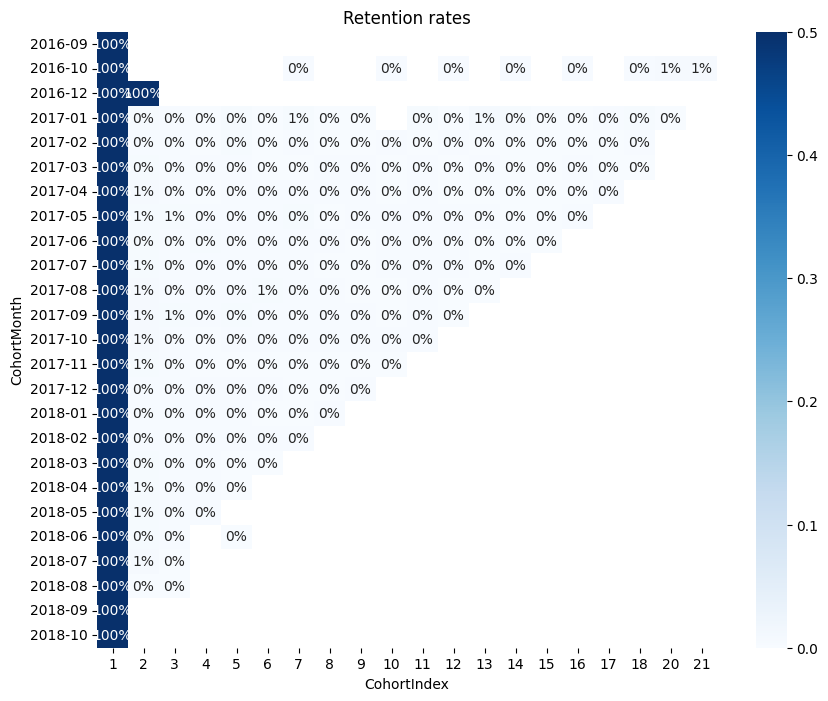

In [269]:
plt.figure(figsize=(10, 8))
plt.title('Retention rates')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap='Blues')
plt.show()